### **About the Data**

**Amazon Alexa is a cloud-based voice service developed by Amazon that allows customers to interact with technology. There are currently over 40 million Alexa users around the world.This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.**

### **What you can do with this Data ?**

***You can use this data to analyze Amazon’s Alexa product ; discover insights into consumer reviews and assist with machine learning models.You can also train your machine models for sentiment analysis and analyze customer reviews how many positive reviews ? and how many negative reviews ?***

In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
data = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [4]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :',data.shape[1])
data.head()

No. of Rows : 3150
No. of Columns : 5


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## **Data Integrity Check**

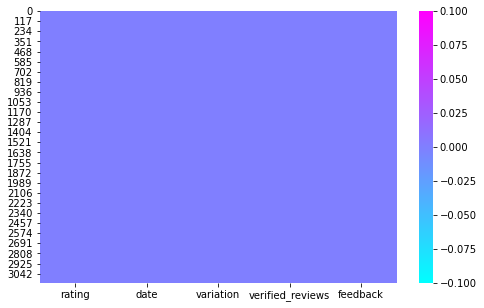

In [5]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.heatmap(data.isnull(), cmap = 'cool')
plt.show()

In [6]:
data.isnull().sum().any()

False

**No Missing Value present in data**

In [7]:
data.duplicated().sum()

715

**715 Entries are duplicated so will will drop them**

In [8]:
data.drop_duplicates(keep = 'last', inplace =True)

**Duplicated entries are drop from dataset.**

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,2435.0,4.435318,1.109562,1.0,4.0,5.0,5.0,5.0
feedback,2435.0,0.909240,0.287326,0.0,1.0,1.0,1.0,1.0


In [10]:
data.groupby('feedback').describe()

rating                                             
           count      mean       std  min  25%  50%  75%  max
feedback                                                     
0          221.0  1.361991  0.481667  1.0  1.0  1.0  2.0  2.0
1         2214.0  4.742096  0.541849  3.0  5.0  5.0  5.0  5.0

#### Comment :


### **Exploration of Ratings**

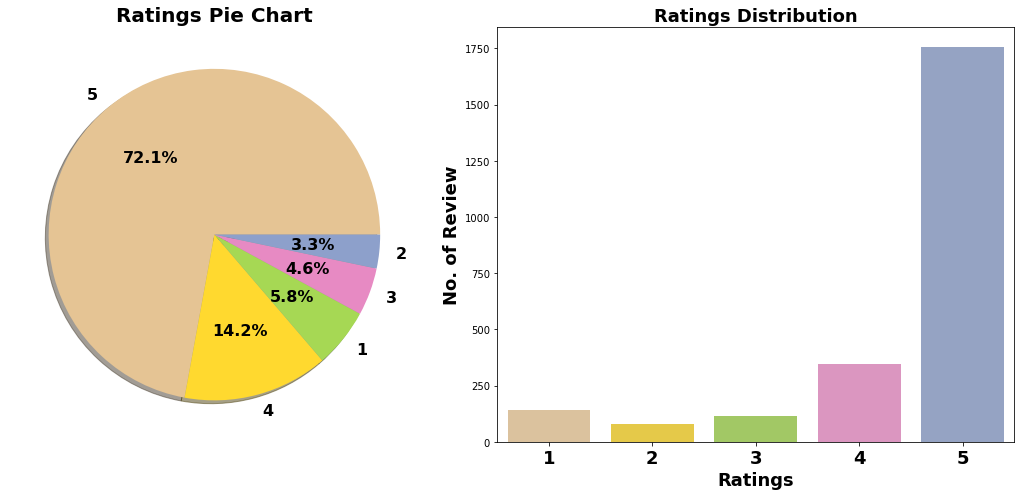

Value Counts of Rating:


5    1756
4     345
1     141
3     113
2      80
Name: rating, dtype: int64

In [11]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
data['rating'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('rating',data=data,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
data['rating'].value_counts()

#### Comment :
**Around 72.1% customer given 5- star rating while 3.3% customer given lowest 1-star rating.**

In [12]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


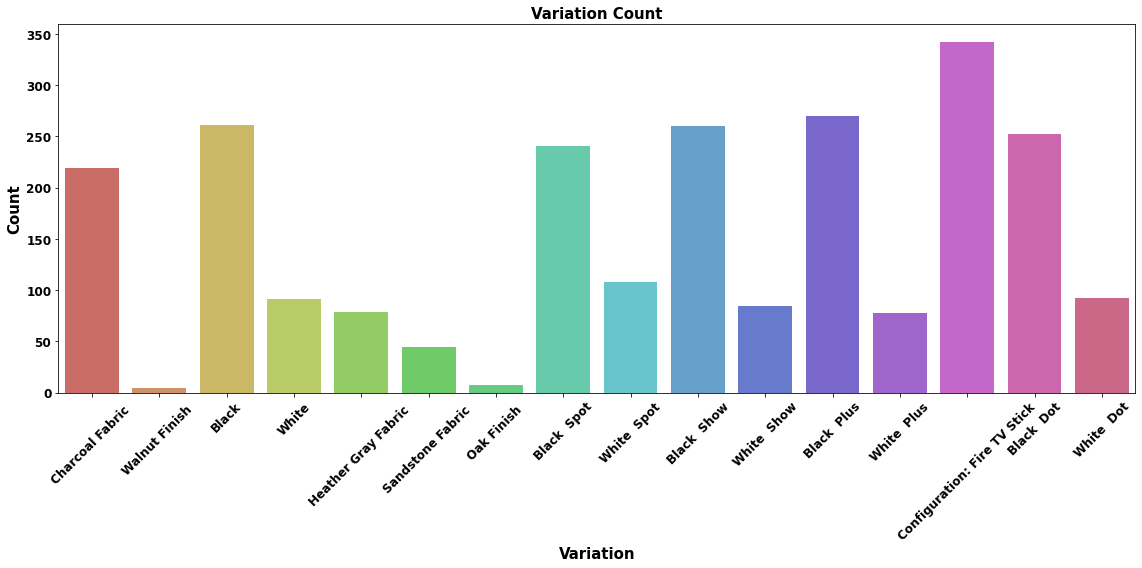

In [13]:
#Plotting Variation
plt.figure(figsize=(16,8))
sns.countplot(x='variation', data=data, palette="hls")
plt.xlabel("Variation", fontsize=15, fontweight = 'bold') #seting the xtitle and size
plt.ylabel("Count", fontsize=15, fontweight = 'bold') # Seting the ytitle and size
plt.title("Variation Count", fontsize=15, fontweight = 'bold') 
plt.xticks(fontsize=12, fontweight = 'bold')
plt.yticks(fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, fontweight = 'bold')
plt.show()

In [18]:
#lets check the length of the reviews
data['length'] = data['verified_reviews'].apply(len)

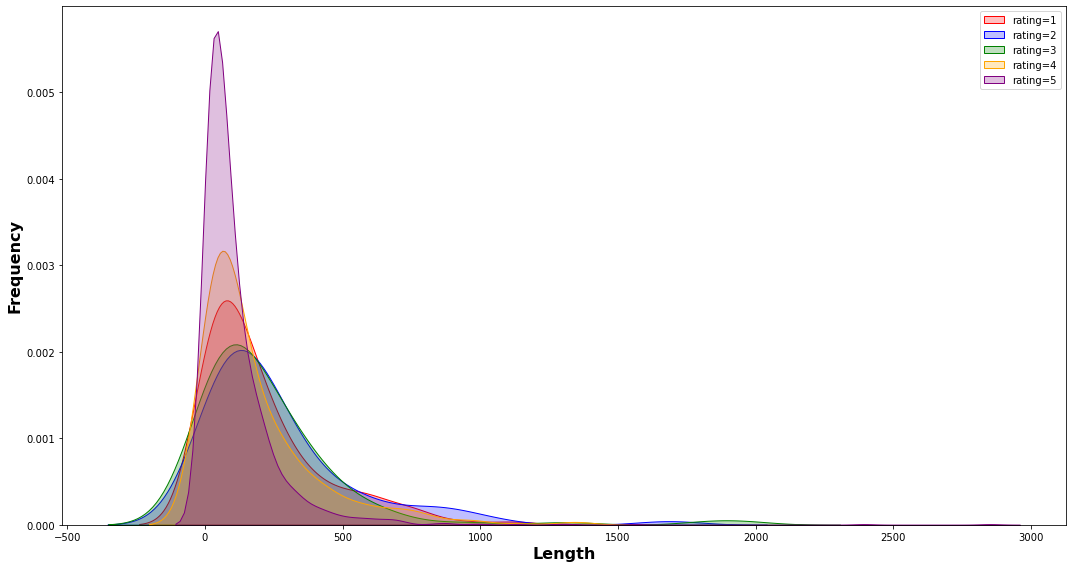

In [20]:
plt.figure(figsize=(15, 8))
g = sns.kdeplot(data["length"][(data["rating"] == 1) & (data["length"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data["length"][(data["rating"] == 2) & (data["length"].notnull())], ax =g, color="Blue", shade= True)
g = sns.kdeplot(data["length"][(data["rating"] == 3) & (data["length"].notnull())], color="Green", shade = True)
g = sns.kdeplot(data["length"][(data["rating"] == 4) & (data["length"].notnull())], color="Orange", shade = True)
g = sns.kdeplot(data["length"][(data["rating"] == 5) & (data["length"].notnull())], color="Purple", shade = True)
g.set_xlabel("Length", fontsize=16, fontweight = 'bold')
g.set_ylabel("Frequency", fontsize=16, fontweight = 'bold')
g = g.legend(["rating=1","rating=2","rating=3","rating=4","rating=5"])

#### Feature Extraction

In [24]:
# Creating new columns sentiment based on overall ratings
def sentiments(df):
    if df['rating'] > 3.0:
        return 'Positive'
    elif df['rating'] <= 3.0:
        return 'Negative'
data['sentiment'] = data.apply(sentiments, axis = 1)

In [26]:
data.head(3)

,rating,date,variation,verified_reviews,feedback,length,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,Positive


In [27]:
# Creating new dataframe for sentiment analysis
data = data[['verified_reviews','sentiment']]

In [28]:
data.head()

,verified_reviews,sentiment
0,Love my Echo!,Positive
1,Loved it!,Positive
2,"Sometimes while playing a game, you can answer...",Positive
3,I have had a lot of fun with this thing. My 4 ...,Positive
4,Music,Positive


## Text Mining

In [29]:
from nltk.corpus import stopwords

In [30]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [31]:
#Calling the class
clean_text(data, 'verified_reviews')
data['verified_reviews'].tail(3)

3147    love things running entire home tv lights ther...
3148    complaint sound quality great mostly use comma...
3149                                                 good
Name: verified_reviews, dtype: object

### Converting Sentiment into numeric feature

In [34]:
# Label encoding Target feature
lb = LabelEncoder()
data['sentiment'] = lb.fit_transform(data['sentiment'])

**We have label encoding target variable. Encoded value 1 means positive review while encoded value 0 means negative.**

### Visualization of Wordcloud

#### **Word Cloud**
- **Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.**
- **The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.**
- **The enlarged texts are the most number of words used there and small texts are the less number of words used.**

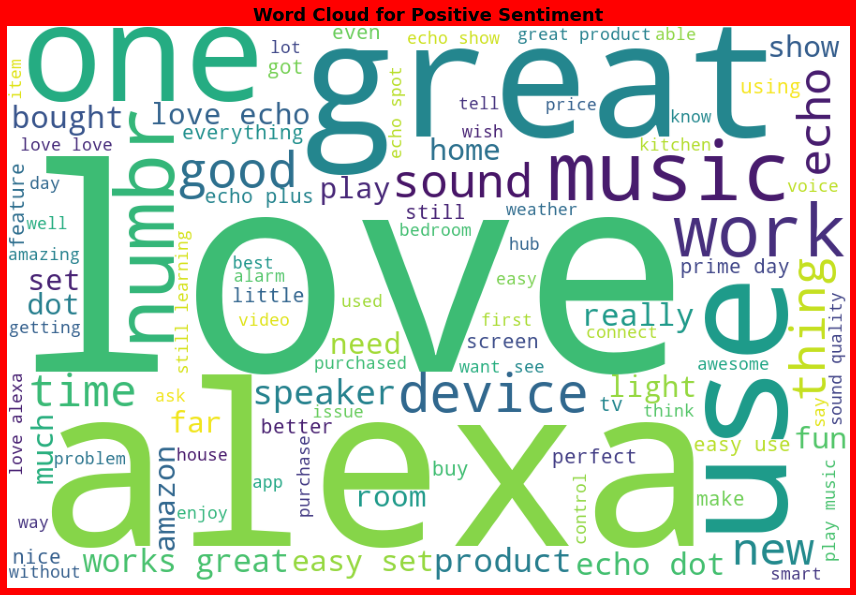

In [40]:
# Word cloud of Positive Sentiment
one = data['verified_reviews'][data['sentiment'] == 1.0]
one_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 100).generate(' '.join(one))
plt.figure(figsize = (12,9), facecolor = 'r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment', fontsize= 18, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

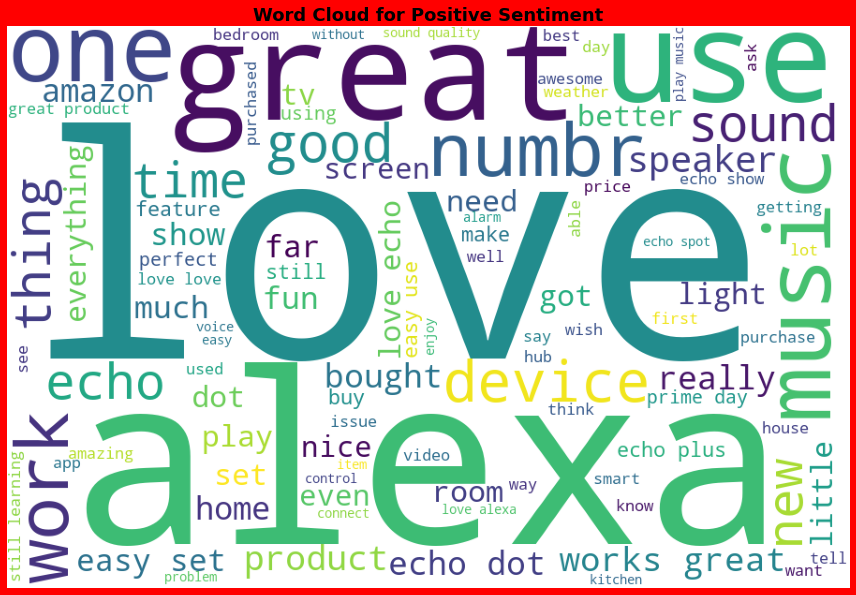

In [41]:
# Word cloud of Negative Sentiment
zero = data['verified_reviews'][data['sentiment'] == 0]
zero_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 100).generate(' '.join(one))
plt.figure(figsize = (12,9), facecolor = 'r')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment', fontsize= 18, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

### Tokenization, Word Embedding and Padding

In [42]:
tokenizer = Tokenizer(num_words = 1000, split = ' ')
tokenizer.fit_on_texts(data['verified_reviews'].values)
x = tokenizer.texts_to_sequences(data['verified_reviews'].values)
x = pad_sequences(x)
x

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0,   0, 159],
       [  0,   0,   0, ...,  65, 228,  21],
       ...,
       [  0,   0,   0, ...,  88,  43,  29],
       [  0,   0,   0, ..., 768, 647, 118],
       [  0,   0,   0, ...,   0,   0,  15]])

In [45]:
x.shape[1] 

234

## Deep NLP Model Building

In [66]:
model =  Sequential()
model.add(Embedding(1000,120,input_length = x.shape[1] ))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 234, 120)          120000    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 234, 120)         0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 176)               209088    
                                                                 
 dense_4 (Dense)             (None, 2)                 354       
                                                                 
Total params: 329,442
Trainable params: 329,442
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
# Splitting the data into training and testing
y = pd.get_dummies(data['sentiment'])
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.3, random_state = 99)

In [68]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [69]:
batch_size = 32
model.fit(x_train, y_train, epochs = 40, batch_size=batch_size, verbose = 1)

Epoch 1/40
54/54 [==============================] - 71s 1s/step - loss: 0.4200 - accuracy: 0.8556
Epoch 2/40
54/54 [==============================] - 82s 2s/step - loss: 0.3239 - accuracy: 0.8656
Epoch 3/40
54/54 [==============================] - 90s 2s/step - loss: 0.2220 - accuracy: 0.9090
Epoch 4/40
54/54 [==============================] - 90s 2s/step - loss: 0.1661 - accuracy: 0.9396
Epoch 5/40
54/54 [==============================] - 74s 1s/step - loss: 0.1373 - accuracy: 0.9407
Epoch 6/40
54/54 [==============================] - 70s 1s/step - loss: 0.0976 - accuracy: 0.9577
Epoch 7/40
54/54 [==============================] - 64s 1s/step - loss: 0.0731 - accuracy: 0.9718
Epoch 8/40
54/54 [==============================] - 65s 1s/step - loss: 0.0939 - accuracy: 0.9642
Epoch 9/40
54/54 [==============================] - 68s 1s/step - loss: 0.0808 - accuracy: 0.9701
Epoch 10/40
54/54 [==============================] - 72s 1s/step - loss: 0.0557 - accuracy: 0.9736
Epoch 11/40
54/54 [

In [70]:
model.evaluate(x_test, y_test)

23/23 [==============================] - 20s 192ms/step - loss: 0.8397 - accuracy: 0.8591


[0.839663565158844, 0.8590971231460571]